### Preprocessing, one hot encoding:

In [16]:
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
#plot function
def annot(opi, x, y):
    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

df = pd.read_csv("C:/Users/petem/Downloads/assignment04_mushroom_dataset.csv")

dfEncode = pd.get_dummies(df)
df = pd.concat([df['class'], dfEncode], axis=1)
df.head()

,class,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,...,population_s,population_v,population_y,habitat _d,habitat _g,habitat _l,habitat _m,habitat _p,habitat _u,habitat _w
0,p,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,e,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,p,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,e,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df.loc[:, df.columns != 'class'].values
y = df.loc[:, df.columns == 'class'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=None)

### Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression

C = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e2)

FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced',
                                               C=c, multi_class='auto', max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 1.000, C=      0.20000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      0.50000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      0.80000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      1.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      2.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      5.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     10.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     20.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    100.00000, TPR 1.000, FPR 0.000


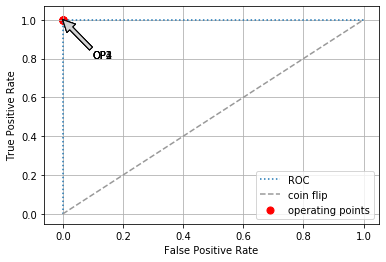

In [19]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Support Vector Machine

In [20]:
from sklearn import svm
from sklearn import metrics
from sklearn.pipeline import Pipeline

##A large C gives you low bias and high variance. Low bias because you penalize the cost of missclasification a lot.
## A small C gives you higher bias and lower variance.

SVM_C = [.000001, .00001, .0001, 0.001,0.1,10,100,300, 10e5]
FPR, TPR = [], []
for c in SVM_C:
    clf = svm.SVC(C = c, gamma = 'auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 1.000, C=      0.00000, TPR 0.000, FPR 0.000
Test Accuracy= 1.000, C=      0.00001, TPR 0.000, FPR 0.000
Test Accuracy= 1.000, C=      0.00010, TPR 0.000, FPR 0.000
Test Accuracy= 1.000, C=      0.00100, TPR 0.000, FPR 0.000
Test Accuracy= 1.000, C=      0.10000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     10.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    100.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    300.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=1000000.00000, TPR 1.000, FPR 0.000


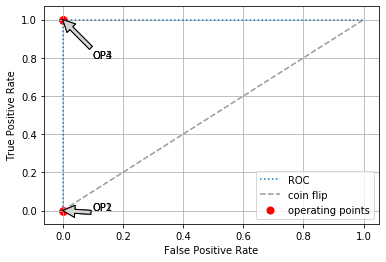

In [21]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Linear SVM

In [22]:
from sklearn import svm
from sklearn import metrics
from sklearn.pipeline import Pipeline

##A large C gives you low bias and high variance. Low bias because you penalize the cost of missclasification a lot.
## A small C gives you higher bias and lower variance.

SVM_C = [.00001, .0001, 0.001,0.1,10,100,300, 500, 1000, 10e5]
FPR, TPR = [], []
for c in SVM_C:
    clf = svm.SVC(C = c, gamma = 'auto', kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 1.000, C=      0.00001, TPR 0.000, FPR 0.000
Test Accuracy= 1.000, C=      0.00010, TPR 0.882, FPR 0.000
Test Accuracy= 1.000, C=      0.00100, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      0.10000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     10.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    100.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    300.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    500.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=   1000.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=1000000.00000, TPR 1.000, FPR 0.000


### Random Forrest Tree

In [23]:
from sklearn.ensemble import RandomForestClassifier

#vary values of k, the number of trees

num_trees = [2, 5, 10, 15, 20, 25, 50, 75, 100]
FPR, TPR = [], []
for c in num_trees:
    
    forest = RandomForestClassifier(n_estimators = c)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 1.000, C=      2.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=      5.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     10.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     15.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     20.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     25.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     50.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=     75.00000, TPR 1.000, FPR 0.000
Test Accuracy= 1.000, C=    100.00000, TPR 1.000, FPR 0.000


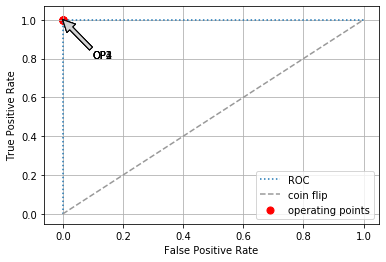

In [24]:
# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 2. [10 pts] What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours?

On my ROC plots, I was expecting to see a curve that hopefully curves up the x axis, along the y axis, with a peak operating point close to the point (0, 1).  However, unexpectedly, this data set yielded ROC curves that percectly fit along the X and Y axis, suggesting the models perfectly fit the data, which is confirmed by the printed model accuracy, TPR, and FPR.  I assume the data set is one that is very easy to fit, and most real world data sets are not nearly this easy to fit and predict.  Additonally, I would've thought varying the hyperparameters may tweak accuracy results, however, this was not the case, as across the board, no matter the hyperparameters, the models easily fit and predicted the data.

### 3. [20 pts] From the ROC plot that you created make a selection of the classifier and hyperparameter setting for this problem. Note that we are classifying mushrooms so your conclusion might be subjective but has to be supported by your findings.

Of the classifiers I tested, if I had to use one, I would choose the support vector machine.  In general, SVM can be considered the least likely to overfit for a given data set.  Given that each of these models yielded perfect results, it leads me to question whether they are not general enough, and may be far too overfitted for this current data set, and thus, I believe the SVM, which has lowest risk of overfitting, is the best choice.  Additionally, I prefer the SVM model, because the model has far more options, due to the kernel trick, which allows us to select different kernels to seperate the data.  Given I think that this data may not be optimal for training, due to its ease of fitting, I think having the extra kernel methods in an SVM may be good to have for generalizing this model to real world data.  